In [38]:
import pandas as pd
data=pd.read_csv("C:\\Users\\hp\\Downloads\\deliverytime.csv")
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [39]:
from geopy.distance import geodesic

def calculate_distance(row):
    delivery_point = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    restaurant_point = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    return geodesic(delivery_point, restaurant_point).kilometers 
data['distance'] = data.apply(calculate_distance, axis=1)



In [40]:
data=data.drop(['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis='columns')


In [41]:
data

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,Snack,motorcycle,24,3.020737
1,34,4.5,Snack,scooter,33,20.143737
2,23,4.4,Drinks,motorcycle,26,1.549693
3,38,4.7,Buffet,motorcycle,21,7.774497
4,32,4.6,Snack,scooter,30,6.197898
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.488112
45589,21,4.6,Buffet,motorcycle,36,10.983242
45590,30,4.9,Drinks,scooter,16,4.648024
45591,20,4.7,Snack,motorcycle,26,6.219668


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int64  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Type_of_order            45593 non-null  object 
 3   Type_of_vehicle          45593 non-null  object 
 4   Time_taken(min)          45593 non-null  int64  
 5   distance                 45593 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ MB


In [43]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,26.294607,99.198950
std,5.696793,0.327708,9.383806,1099.925157
min,15.000000,1.000000,10.000000,1.463837
25%,25.000000,4.600000,19.000000,4.654185
50%,29.000000,4.700000,26.000000,9.247024
75%,34.000000,4.800000,32.000000,13.740932
max,50.000000,6.000000,54.000000,19709.575543


In [44]:
data=data[(data.distance<data.distance.mean()+3*data.distance.std())&(data.distance>data.distance.mean()-3*data.distance.std())]
data

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,Snack,motorcycle,24,3.020737
1,34,4.5,Snack,scooter,33,20.143737
2,23,4.4,Drinks,motorcycle,26,1.549693
3,38,4.7,Buffet,motorcycle,21,7.774497
4,32,4.6,Snack,scooter,30,6.197898
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.488112
45589,21,4.6,Buffet,motorcycle,36,10.983242
45590,30,4.9,Drinks,scooter,16,4.648024
45591,20,4.7,Snack,motorcycle,26,6.219668


In [45]:
data=data[(data.Delivery_person_Age<data.Delivery_person_Age.mean()+3*data.Delivery_person_Age.std())&(data.Delivery_person_Age>data.Delivery_person_Age.mean()-3*data.Delivery_person_Age.std())]
data

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,Snack,motorcycle,24,3.020737
1,34,4.5,Snack,scooter,33,20.143737
2,23,4.4,Drinks,motorcycle,26,1.549693
3,38,4.7,Buffet,motorcycle,21,7.774497
4,32,4.6,Snack,scooter,30,6.197898
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.488112
45589,21,4.6,Buffet,motorcycle,36,10.983242
45590,30,4.9,Drinks,scooter,16,4.648024
45591,20,4.7,Snack,motorcycle,26,6.219668


In [46]:
data=data[(data.Delivery_person_Ratings<data.Delivery_person_Ratings.mean()+3*data.Delivery_person_Ratings.std())&(data.Delivery_person_Ratings>data.Delivery_person_Ratings.mean()-3*data.Delivery_person_Ratings.std())]
data

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,Snack,motorcycle,24,3.020737
1,34,4.5,Snack,scooter,33,20.143737
2,23,4.4,Drinks,motorcycle,26,1.549693
3,38,4.7,Buffet,motorcycle,21,7.774497
4,32,4.6,Snack,scooter,30,6.197898
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.488112
45589,21,4.6,Buffet,motorcycle,36,10.983242
45590,30,4.9,Drinks,scooter,16,4.648024
45591,20,4.7,Snack,motorcycle,26,6.219668


In [47]:
data=data[(data['Time_taken(min)']<data['Time_taken(min)'].mean()+3*data['Time_taken(min)'].std())&(data['Time_taken(min)']>data['Time_taken(min)'].mean()-3*data['Time_taken(min)'].std())]
data

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,37,4.9,Snack,motorcycle,24,3.020737
1,34,4.5,Snack,scooter,33,20.143737
2,23,4.4,Drinks,motorcycle,26,1.549693
3,38,4.7,Buffet,motorcycle,21,7.774497
4,32,4.6,Snack,scooter,30,6.197898
...,...,...,...,...,...,...
45588,30,4.8,Meal,motorcycle,32,1.488112
45589,21,4.6,Buffet,motorcycle,36,10.983242
45590,30,4.9,Drinks,scooter,16,4.648024
45591,20,4.7,Snack,motorcycle,26,6.219668


In [48]:
data=pd.get_dummies(data,drop_first=True)
data

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37,4.9,24,3.020737,0,0,1,0,1,0
1,34,4.5,33,20.143737,0,0,1,0,0,1
2,23,4.4,26,1.549693,1,0,0,0,1,0
3,38,4.7,21,7.774497,0,0,0,0,1,0
4,32,4.6,30,6.197898,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,32,1.488112,0,1,0,0,1,0
45589,21,4.6,36,10.983242,0,0,0,0,1,0
45590,30,4.9,16,4.648024,1,0,0,0,0,1
45591,20,4.7,26,6.219668,0,0,1,0,1,0


In [49]:
x=data.drop('Time_taken(min)',axis='columns')
y=data[['Time_taken(min)']]

In [50]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#data['Delivery_person_Age']=scaler.fit_transform(data[['Delivery_person_Age']])
#data['Delivery_person_Ratings']=scaler.fit_transform(data[['Delivery_person_Ratings']])
#data['distance']=scaler.fit_transform(data[['distance']])
#data

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression": svm.SVR()
}

# Dictionary to store the results
results = {}

# Fit the models and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on the test set
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'MSE': mse, 'R^2 Score': r2}

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2 Score: {metrics['R^2 Score']}")

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multiple Linear Regression - MSE: 70.36143642556236, R^2 Score: 0.21687582899175561
Decision Tree Regression - MSE: 104.92695137795766, R^2 Score: -0.16783903212687612
Support Vector Regression - MSE: 70.01170518504865, R^2 Score: 0.2207683445758103


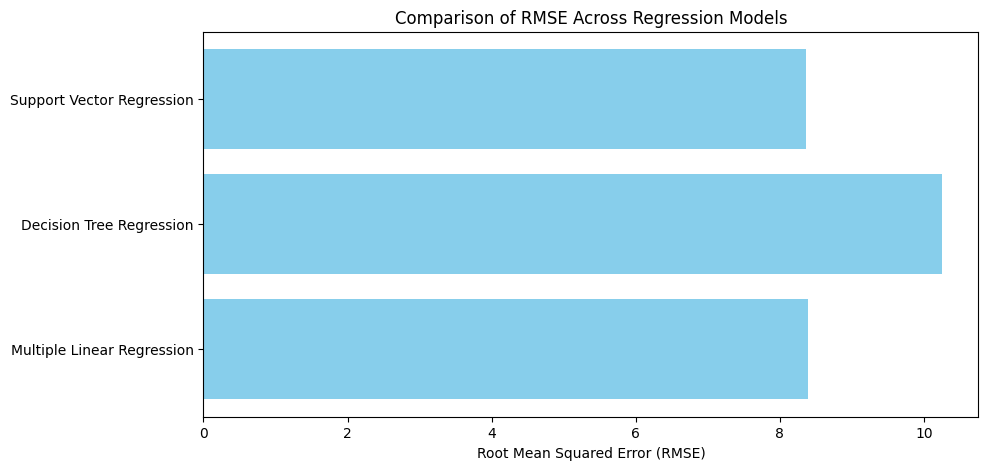

In [53]:
import matplotlib.pyplot as plt
from math import sqrt

# Calculate RMSE for each model from the stored MSE and prepare for plotting
rmse_values = [sqrt(metrics['MSE']) for metrics in results.values()]
model_names = list(results.keys())

# Create a horizontal bar graph for RMSE
plt.figure(figsize=(10, 5))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE Across Regression Models')
plt.show()

In [54]:
model1=svm.SVR()
model2=LinearRegression()
model3=DecisionTreeRegressor(random_state=42)
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
print("Accuracy of Support Vector Machine:",model1.score(x_test,y_test))
print("Accuracy of Linear Regression:",model2.score(x_test,y_test))
print("Accuracy of Decision Tree Regressor:",model3.score(x_test,y_test))

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Support Vector Machine: 0.2207683445758103
Accuracy of Linear Regression: 0.21687582899175561
Accuracy of Decision Tree Regressor: -0.16783903212687612


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

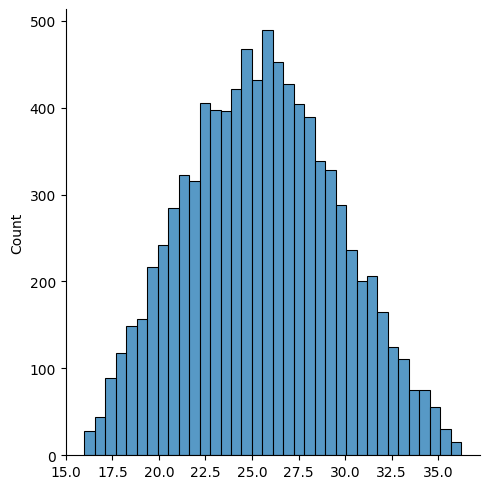

In [55]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.displot(y_pred)
plt.show()

In [56]:
import pickle
file=open('Delivery_rf.pkl','wb')
pickle.dump([model1,model2,model3],file)

In [57]:
with open('Delivery_rf.pkl','rb') as file:
    mp = pickle.load(file)